# Diabetes
This data set contains 768 records, 8 attributes, 268 positive results for diabetes test and 500 negative result. All patients were females at least 21 years old.

* Pregnancies -- Number of times pregnant
* Glucose -- Plasma glucose concentration at 2 hours in an oral glucose tolerance test
* BloodPressure -- Diastolic blood pressure (MMHG)
* SkinThickness -- Triceps skin fold thickness (mm)
* Insulin -- 2-Hour serum insulin (mu U/ml)
* BMI -- Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction -- diabetes pedigree function
* Age -- in years
* outcome -- 1 true 0 false

## Data Summary and EDA

In [1]:
# read csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection, preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
pd_df = pd.read_csv(
    'https://raw.githubusercontent.com/zcolley/cs381-MatthewFried/main/project/diabetes.csv')

pd_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# check if there is null value in each attribute

pd_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null value exists. No need to impute or to drop any null value.

In [3]:
# check data type
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# check if unique value in each column
pd_df.nunique().sort_values()

Outcome                       2
Pregnancies                  17
BloodPressure                47
SkinThickness                51
Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64

So there is no third unique value in outcome column.

In [5]:
# show stats
pd_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It is weird that some columns have 0 as the min value.

In [6]:
corr_val = pd_df.corr()
corr_val


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

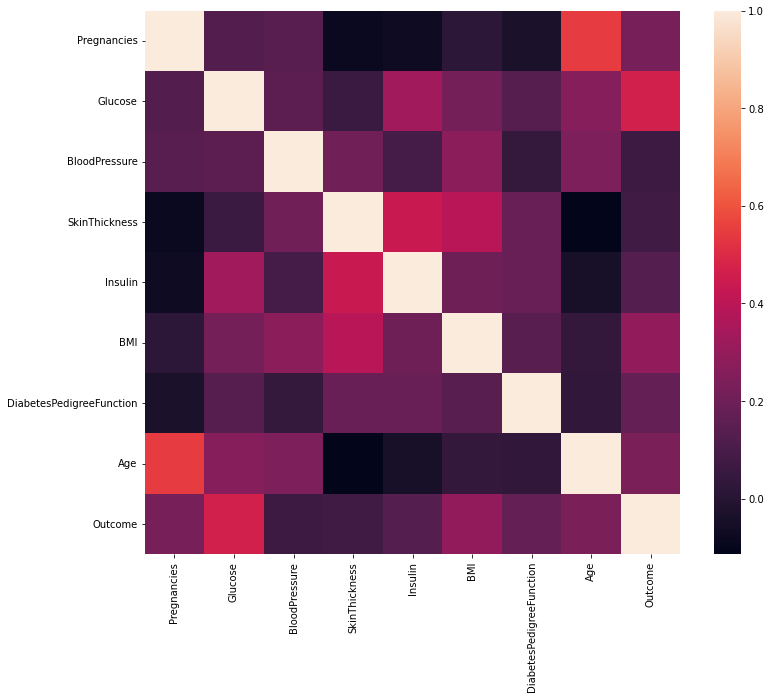

In [7]:
# show correlation matrix
plt.figure(figsize=(12,10))

sns.heatmap(data = corr_val)


 Note from the above graph that outcome and glucose are related,but not strongly related. Rest does not seem related.

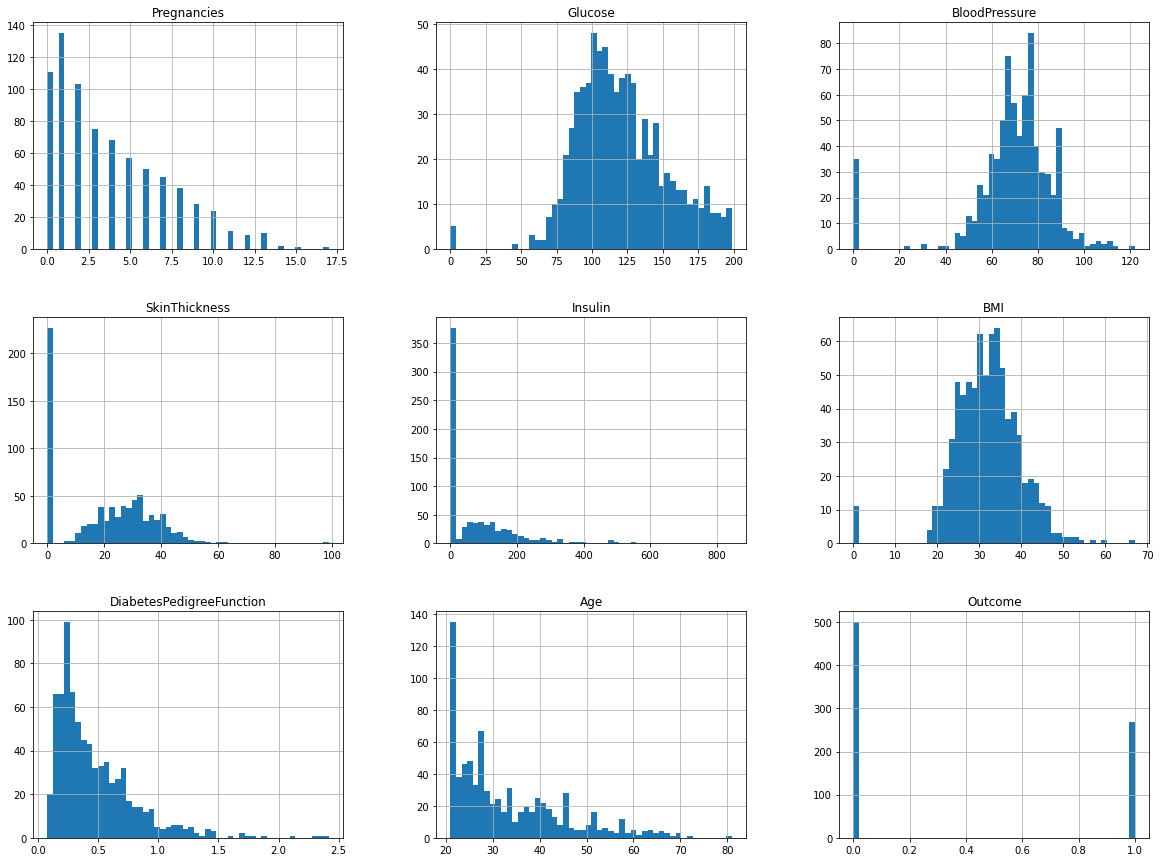

In [8]:
# create histgram for each attributes
pd_df.hist(bins=50,figsize=(20,15))
plt.show()

In blood pressure graph, bmi graph, and skin thickness graph there were  some outliers. The pregnancies graph shows that a person had been pregnant 17 times, and about 110 people have not been pregnant yet. It is so weird that a person has 0 glucose, which does not make any sense.

In [9]:
def change_size():
    plt.figure(figsize=(15,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4a57e53d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4a57e5d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4a5692d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4a57e5130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4a5322d60>],
 'means': []}

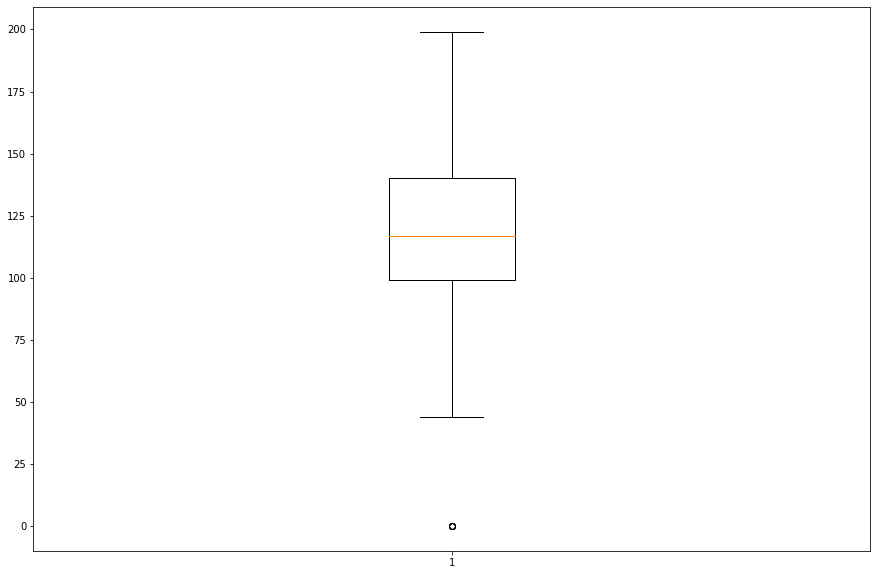

In [10]:
# use boxplot to see outliers
change_size()
plt.boxplot(pd_df['Glucose'])


Note from above boxplot graph there is one outlier rest are in range. And its median is around 115.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4a5e32160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4a5e32d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4a49a5c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4a5e32640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4a5e32820>],
 'means': []}

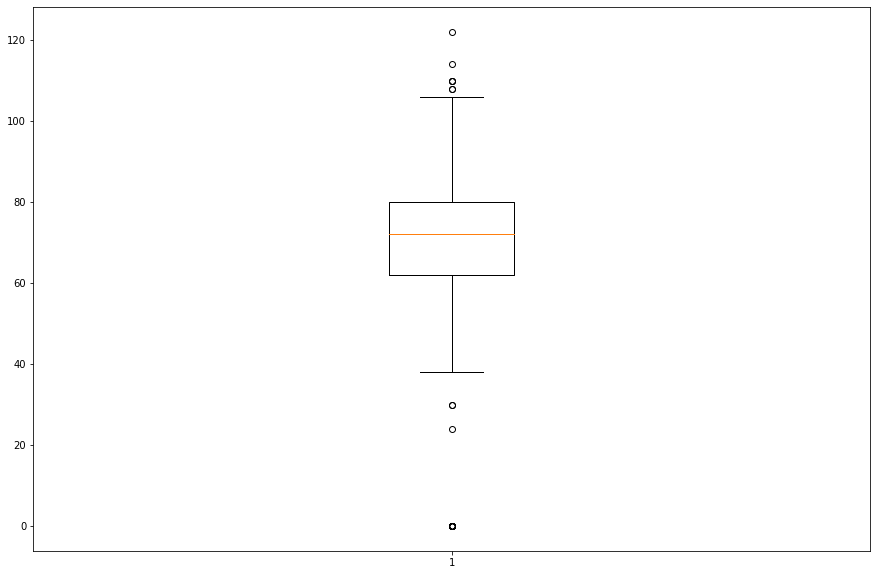

In [11]:
# use boxplot to see outlier in blood pressure column
change_size()
plt.boxplot(pd_df['BloodPressure'])

It seems there are 7 different outliers, but 0 blood pressure does not make any sense. Going to drop row with 0 blood pressure.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4a53c4730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4a53c4e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4a53c4700>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4a5e5d250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4a5e5de80>],
 'means': []}

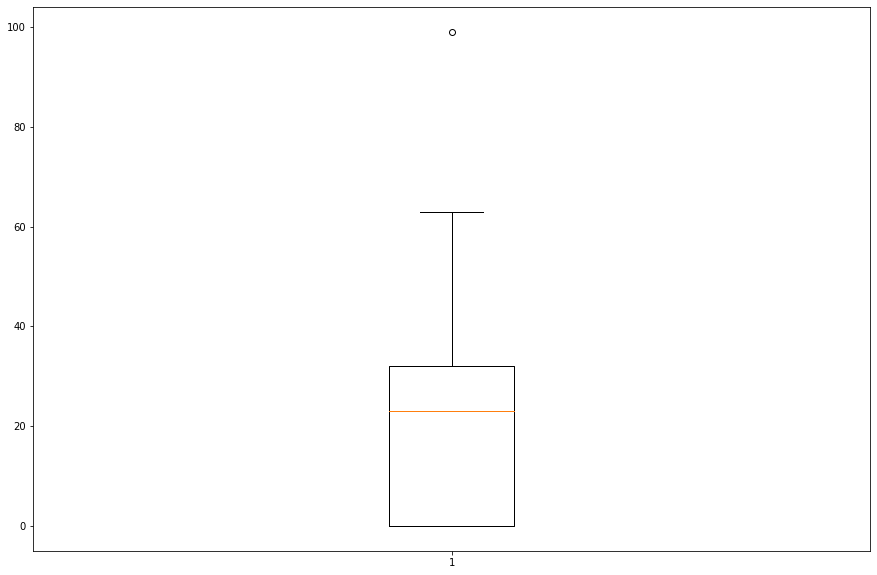

In [12]:
# show boxplot of skin thickness
change_size()
plt.boxplot(pd_df['SkinThickness'])

Note from above boxplot that tells only one outlier. going to drop it.

In [13]:
# change 0 value to nan
pd_df[['Glucose','BloodPressure','SkinThickness','Insulin',
    'BMI']]= pd_df[['Glucose','BloodPressure','SkinThickness',
    'Insulin','BMI']].replace(0,np.NaN)

pd_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Note from above this dataset contains a lot of zeros, so I convert zeros to nan.

In [14]:
# replace nan values
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
    pd_df[col].fillna(method='ffill',inplace=True)



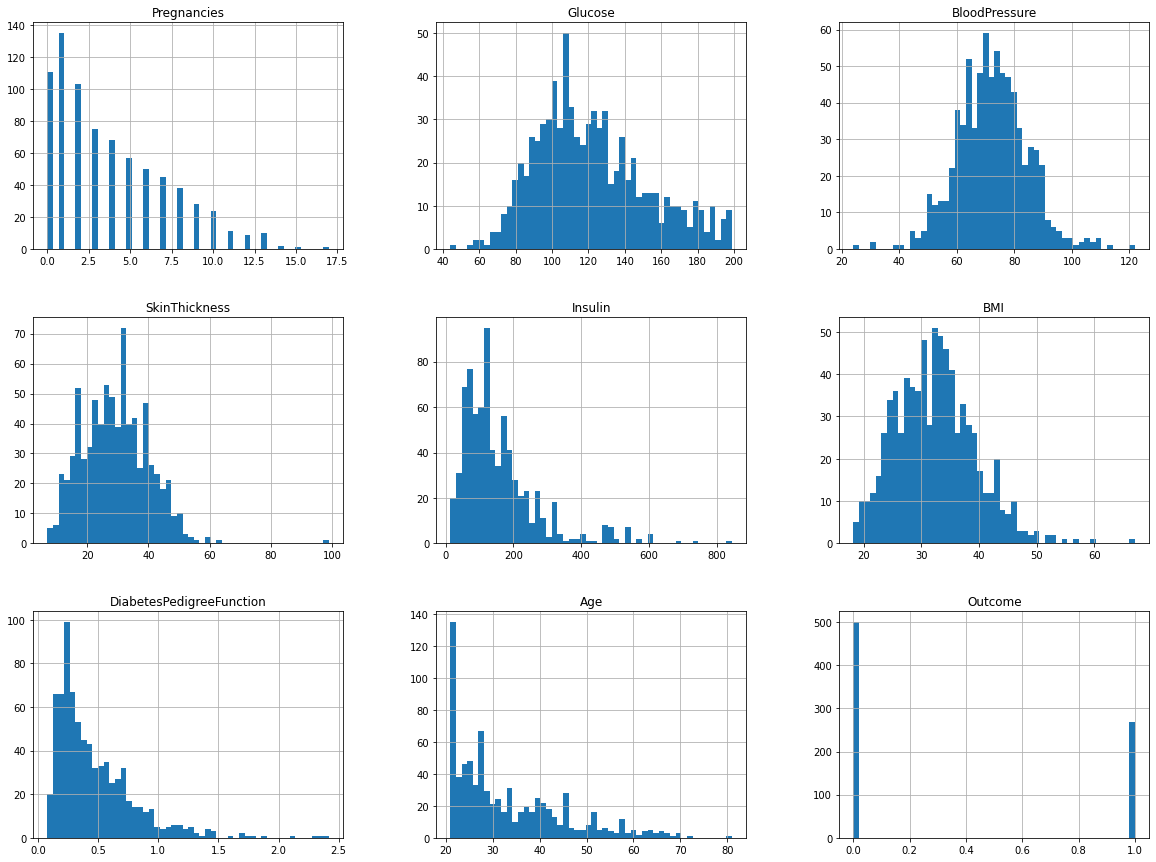

In [15]:
pd_df.hist(bins=50, figsize=(20, 15))
plt.show()


Note from the above graph there is no zero value in graphs. Outcome and pregnancies graph can have zeros because they should have.

<AxesSubplot:>

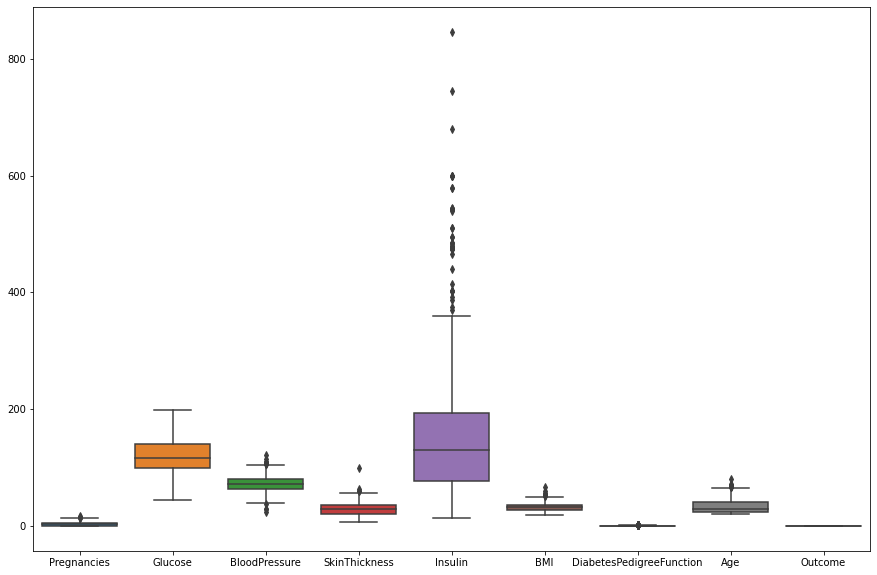

In [16]:
change_size()
sns.boxplot(data=pd_df)

Note from the above, we see there are a lot of outliers in the insulin column and some columns have some outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4a57d7b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd49ff0d3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4a57d77c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd49ff0db20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd49ff0dfd0>],
 'means': []}

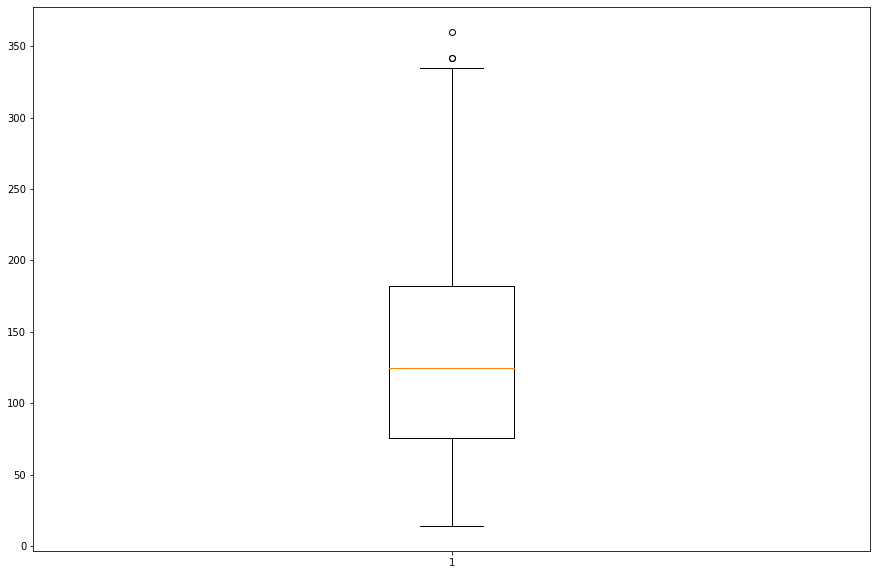

In [17]:
# handle outliers for Insulin column
q1 = pd_df['Insulin'].quantile(.25)
q3 = pd_df['Insulin'].quantile(.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
pd_df[pd_df['Insulin'] > upper_bound]
pd_df =pd_df[(pd_df['Insulin'] > lower_bound) & (pd_df['Insulin'] < upper_bound)]

change_size()
plt.boxplot(pd_df['Insulin'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4a5184d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4a51892e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4a5184a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4a5189880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4a5189b50>],
 'means': []}

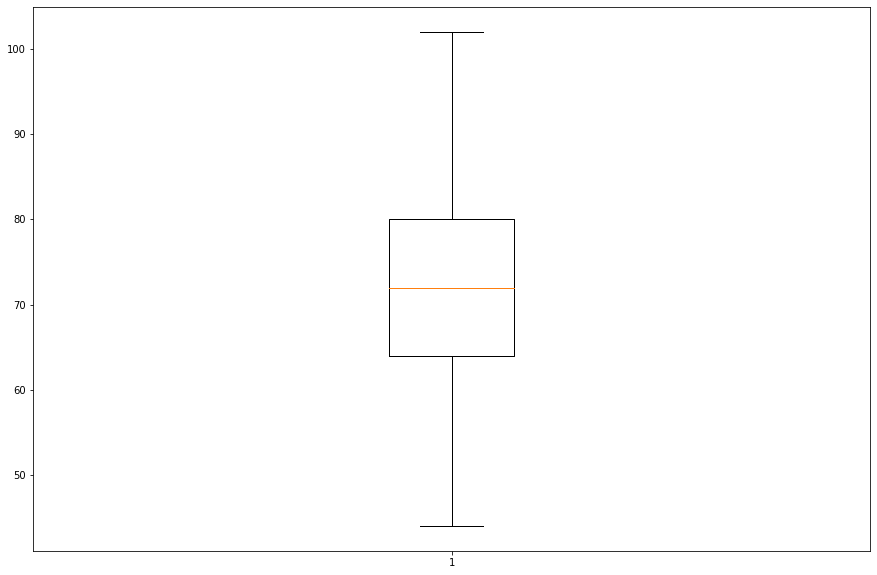

In [18]:
# handle outliers for bloodPressure
q1 = pd_df['BloodPressure'].quantile(.25)
q3 = pd_df['BloodPressure'].quantile(.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
pd_df[pd_df['BloodPressure'] > upper_bound]
pd_df = pd_df[(pd_df['BloodPressure'] > lower_bound) &
              (pd_df['BloodPressure'] < upper_bound)]

change_size()
plt.boxplot(pd_df['BloodPressure'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd49fe5ed90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4a5523370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd49fe5eac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4a5523910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4a5523be0>],
 'means': []}

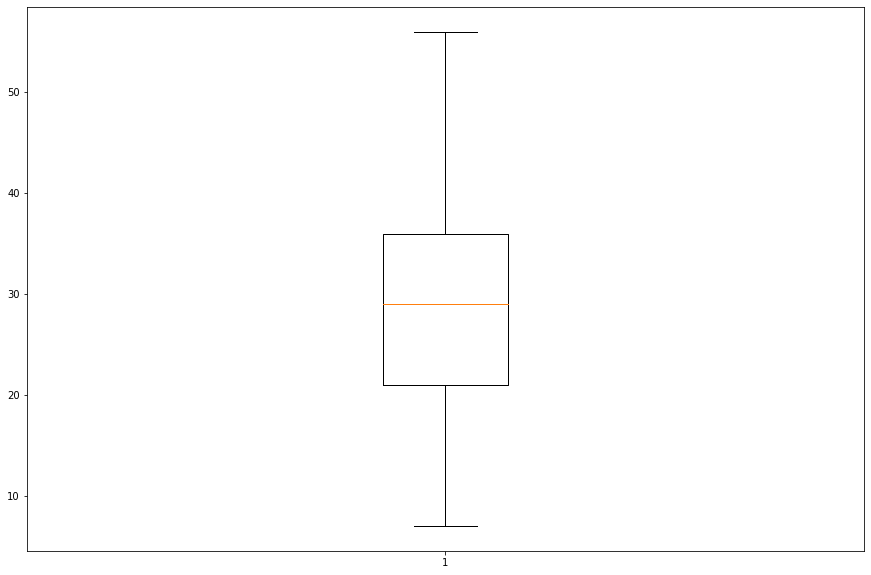

In [19]:
# handle outliers for skinthickness
q1 = pd_df['SkinThickness'].quantile(.25)
q3 = pd_df['SkinThickness'].quantile(.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
pd_df[pd_df['SkinThickness'] > upper_bound]
pd_df = pd_df[(pd_df['SkinThickness'] > lower_bound) &
              (pd_df['SkinThickness'] < upper_bound)]

change_size()
plt.boxplot(pd_df['SkinThickness'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4a57ab7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4a57abd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4a57ab520>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4a57a4340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4a57a4640>],
 'means': []}

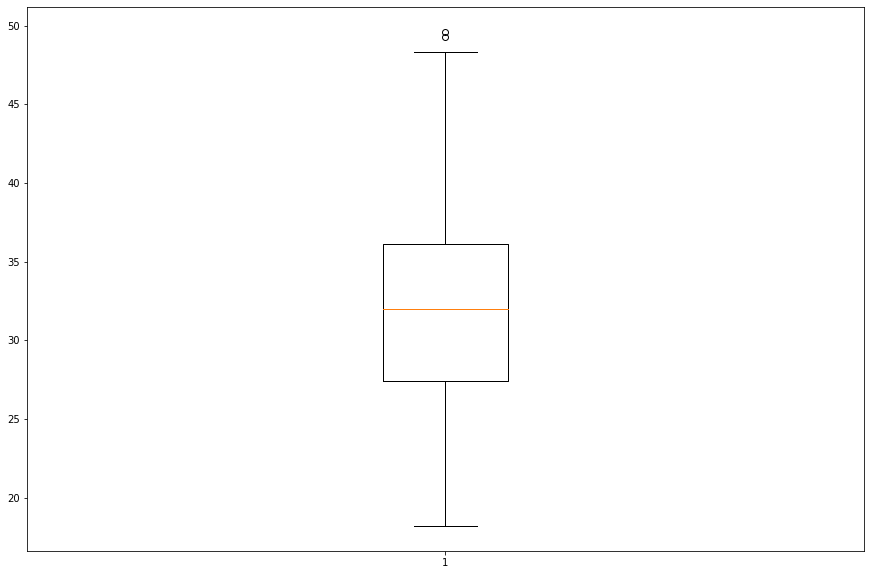

In [20]:
# handle outliers for bmi
q1 = pd_df['BMI'].quantile(.25)
q3 = pd_df['BMI'].quantile(.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
pd_df[pd_df['BMI'] > upper_bound]
pd_df = pd_df[(pd_df['BMI'] > lower_bound) &
              (pd_df['BMI'] < upper_bound)]

change_size()
plt.boxplot(pd_df['BMI'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4a5f00d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4a5ef8340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4a5f00a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4a5ef88e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4a5ef8bb0>],
 'means': []}

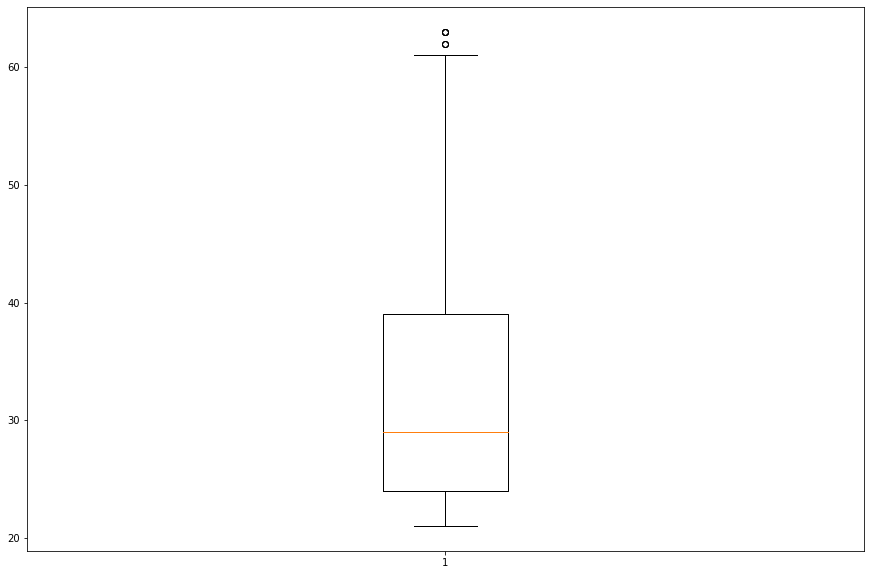

In [21]:
# handle outliers for age

q1 = pd_df['Age'].quantile(.25)
q3 = pd_df['Age'].quantile(.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
pd_df[pd_df['Age'] > upper_bound]
pd_df = pd_df[(pd_df['Age'] > lower_bound) &
              (pd_df['Age'] < upper_bound)]

change_size()
plt.boxplot(pd_df['Age'])


<AxesSubplot:>

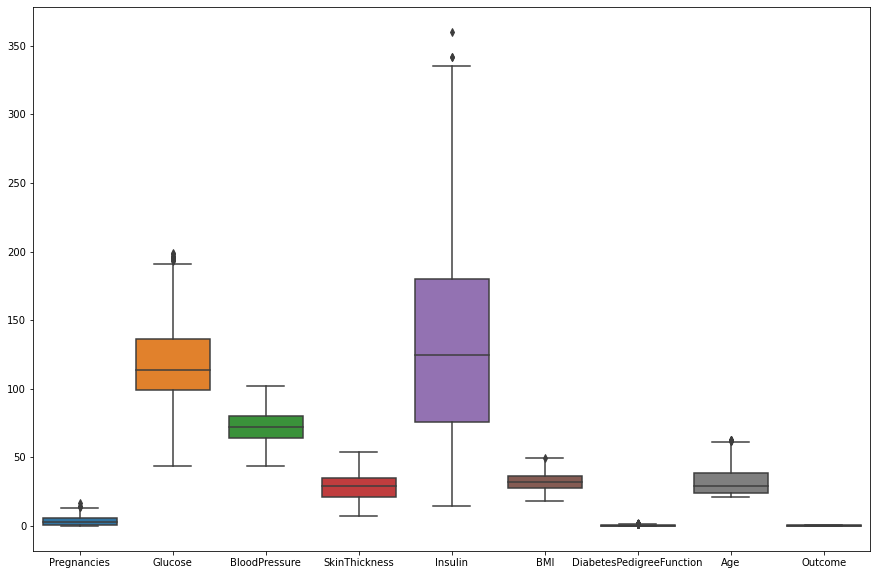

In [22]:
# see boxplot after handle outliers for all column
change_size()
sns.boxplot(data = pd_df)

### EDA Summary
From the EDA, I found out that age and glucose are strongly related. Outcome, Glucose, and pregnancies are weakly related. In this dataset, some columns have zero values, which is not acceptable in this case. There are also outliers in the columns.

## Logistic Regression

In [23]:
# create regession
df = pd_df.copy()
X = df.drop(df[['Outcome']],axis = 1)
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25)
model = LogisticRegression()
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred.reshape(-1,1))


[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# take subset of outcome column
elements = len(y_pred)
import random
acutal_pred = random.sample(pd_df['Outcome'].tolist(),elements)


In [25]:
# create tp,tn,fp,fn
tp = tn = fp = fn = 0
for acu,pred in zip(acutal_pred,y_pred):
    if acu == 1 and pred == 1:
        tp += 1
    elif acu == 0 and pred == 0:
        tn += 1
    elif acu == 0 and pred == 1:
        fp += 1
    elif acu == 1 and pred == 0:
        fn += 1

print(tp,tn,fp,fn)


16 85 27 43


In [26]:
# calculate accuracy
own_score = {}
own_score['accuracy'] = (tp + tn) / (tp + fp + fn + tn)
own_score['precision'] = tp / (tp + fp)
own_score['recall'] = tp / (tp + fn)
own_score['specificity'] = tn / (tn + fp)
own_score['f1'] =  2 * (own_score['precision'] * own_score['recall']) / (own_score['precision'] + own_score['recall'])

own_score

{'accuracy': 0.5906432748538012,
 'precision': 0.37209302325581395,
 'recall': 0.2711864406779661,
 'specificity': 0.7589285714285714,
 'f1': 0.3137254901960784}

F1 score is pretty low and precision is also pretty low. I guess it is not a good model.

In [27]:
# use library to do metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy Score is ',accuracy_score(acutal_pred,y_pred))
print('F1 score: ',f1_score(acutal_pred,y_pred))
print('Precision score: ',precision_score(acutal_pred,y_pred))
print('Recall score: ',recall_score(acutal_pred,y_pred))


Accuracy Score is  0.5906432748538012
F1 score:  0.3137254901960784
Precision score:  0.37209302325581395
Recall score:  0.2711864406779661


It is pretty close to what I have above.

In [28]:
# data selection 
# k best selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
target = pd_df['Outcome']
features = pd_df.drop(['Outcome'],axis = 1).copy()

select_kbest = SelectKBest(f_regression,k = 5).fit(features,target)
features_kbest = select_kbest.get_support()
print('chosen feawtures: ', features.columns[features_kbest],'\n')

select_kbest.scores_

chosen feawtures:  Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object') 



array([ 38.45485914, 206.83898487,  17.213195  ,  12.67607073,
        13.91082059,  56.38485365,  28.06863655,  53.38335599])

In [29]:
scores = pd.DataFrame({'Feature Name':features.columns,'Score':select_kbest.scores_}).sort_values(by='Score',ascending=False)
print(scores)

               Feature Name       Score
1                   Glucose  206.838985
5                       BMI   56.384854
7                       Age   53.383356
0               Pregnancies   38.454859
6  DiabetesPedigreeFunction   28.068637
2             BloodPressure   17.213195
4                   Insulin   13.910821
3             SkinThickness   12.676071


In [30]:
# rfe selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(estimator = lr, n_features_to_select = 5 , step = 1)

rfe.fit(features,target)
rfe_features = features.columns[rfe.support_]
print(rfe_features)

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector
feature_name = list(features.columns)

feature_selector = SequentialFeatureSelector(LinearRegression(
), k_features=5, forward=False, scoring='neg_mean_squared_error', cv=4)
feature_filtered = feature_selector.fit(features.values, target.values)

backward_features = list(feature_filtered.k_feature_names_)
print(backward_features)
original_features = pd.DataFrame({'Features':features.columns})

['0', '1', '3', '5', '6']


In [32]:
# get a list of the actual names
backward_df = []
backward_df.append(original_features['Features'].loc[0])
backward_df.append(original_features['Features'].loc[1])
backward_df.append(original_features['Features'].loc[3])
backward_df.append(original_features['Features'].loc[5])
backward_df.append(original_features['Features'].loc[6])
backward_df = pd.DataFrame({'Backward': backward_df})
print(backward_df)


                   Backward
0               Pregnancies
1                   Glucose
2             SkinThickness
3                       BMI
4  DiabetesPedigreeFunction


In [33]:
# redo regression 
#Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
from sklearn.linear_model import LogisticRegression
X = pd_df.drop(['Outcome', 'BloodPressure','Insulin', 'SkinThickness'], axis=1)
y = pd_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
model = LogisticRegression()


model = model.fit(X_train, y_train)
model.score(X,y)

0.775330396475771

It seems pretty good model

In [34]:
lr = LogisticRegression()
lr.fit(X_train,y_train.ravel())
predictions = lr.predict(X_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.74      0.88      0.81       108
           1       0.70      0.48      0.57        63

    accuracy                           0.73       171
   macro avg       0.72      0.68      0.69       171
weighted avg       0.73      0.73      0.72       171



In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X, y)
r_sq = lin_reg.score(X, y)
print(r_sq)


0.31293895442645914


Not so good linear regression model.

### Imbalanced Data

(array([455.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 226.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

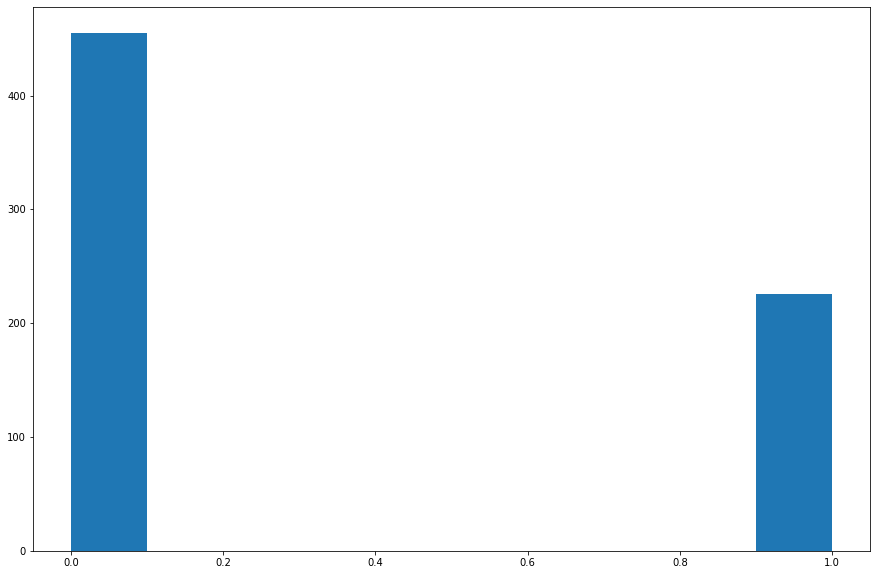

In [36]:
change_size()
plt.hist(pd_df['Outcome'])

In [37]:
#print out shape
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (510, 5)
Number transactions y_train dataset:  (510,)
Number transactions X_test dataset:  (171, 5)
Number transactions y_test dataset:  (171,)


The data seems Imbalanced.

In [38]:
# import smote module to handle imbalanced data
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

os = SMOTE(random_state=0)
X_train_res, y_train_res = os.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 163
Before OverSampling, counts of label '0': 347 

After OverSampling, the shape of train_X: (694, 5)
After OverSampling, the shape of train_y: (694,) 

After OverSampling, counts of label '1': 347
After OverSampling, counts of label '0': 347


In [39]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
model = LogisticRegression()
model = model.fit(X_train_res, y_train_res)
model.score(X_train_res,y_train_res)

0.7463976945244957

In [40]:

lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       116
           1       0.59      0.62      0.60        55

    accuracy                           0.74       171
   macro avg       0.70      0.71      0.70       171
weighted avg       0.74      0.74      0.74       171



From the above we see that recall value is balanced.

In [41]:
# create metrics
print('Accuracy Score is ', accuracy_score(y_test, predictions))
print('F1 score: ', f1_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))


Accuracy Score is  0.7368421052631579
F1 score:  0.6017699115044246
Precision score:  0.5862068965517241
Recall score:  0.6181818181818182


It improves a lot compared to the one without doing smote algorithm.

In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)


[[92 24]
 [21 34]]


<Figure size 1080x720 with 0 Axes>

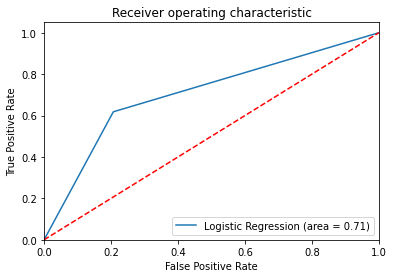

In [43]:
#roc
change_size()
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,predictions)
fpr,tpr,thresholds = roc_curve(y_test,predictions)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()


### chi square


In [53]:
X = df.drop(df[['Outcome']], axis=1)
y = df['Outcome']



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
5,5,116.0,74.0,35.0,168.0,25.6,0.201,30
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
7,10,115.0,50.0,32.0,88.0,35.3,0.134,29
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,180.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,23.0,112.0,30.1,0.349,47


In [57]:
from sklearn.feature_selection import chi2

chc = SelectKBest(score_func=chi2, k='all')
chc.fit(X, y)

features_score_pvalue=pd.DataFrame({"Score":chc.scores_,"P_Value":np.round(chc.pvalues_,3)},index=X.columns)
features_score_pvalue.nlargest(n=21,columns="Score")

,Score,P_Value
Glucose,1137.451651,0.000
Insulin,551.126415,0.000
Age,171.214026,0.000
Pregnancies,108.527968,0.000
BMI,65.120081,0.000
SkinThickness,42.856128,0.000
BloodPressure,28.132511,0.000
DiabetesPedigreeFunction,5.462514,0.019


In [82]:
#create svm model
from sklearn import svm

clf = svm.SVC(kernel='poly')
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)


In [83]:
# print out accuracy precision recall scores
from sklearn.metrics import confusion_matrix
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:", metrics.recall_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

# Accuracy Score is  0.7368421052631579
# F1 score:  0.6017699115044246
# Precision score:  0.5862068965517241
# Recall score:  0.6181818181818182


Accuracy: 0.7368421052631579
F1 score:  0.5871559633027522
Precision: 0.5925925925925926
Recall: 0.5818181818181818
[[92 24]
 [21 34]]


SVM model and logistic model have identical output.